## 1. Estimation of $\boldsymbol{J}$

### Maximum likelihood estimator
Our goal is to find the set of parameters $J_{i, j}(a, b)$ for all $i, j \in \{1, \dots, N\}$, $a, b \in \{1, \dots, q\}$ that maximises the likelihood
\begin{align*}
	\mathcal{L}\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right) & \coloneqq P\left(\left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right)
	= \prod_{m = 1}^{M} P\left(\boldsymbol{x}^{(m)} | \boldsymbol{J}\right) = \\
	& = \prod_{m = 1}^{M} \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right] = \\
	& = \frac{1}{Z(\boldsymbol{J})^M} \exp\left[\sum_{m = 1}^M \sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b}\right],
\end{align*}
<!-- remark: we keep using the letter P because it highlight the fact that we are talking about a density, not about the measure of a set -->
where
\begin{equation*}
	Z(\boldsymbol{J}) = \sum_{x_1, \dots, x_N = 1}^q \exp\left[\sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right]
\end{equation*}
is the normalization constant.
To this aim we compute the log-likelihood (and divide by $M$), getting
\begin{equation*}
	l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right) \coloneqq \left(\frac{1}{M} \sum_{m=1}^M\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \log{Z(\boldsymbol{J})}.
\end{equation*}
Deriving w.r.t. $J_{i, j}(a, b)$, for fixed $i, j, a, b$, we get
\begin{equation*}
	\frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} 
	= \left(\frac{1}{M} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \frac{1}{Z(\boldsymbol{J})} \frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)},
\end{equation*}
where
\begin{equation*}
	\frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)} = \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right].
\end{equation*}
Plugging into the previous expression, we find that
\begin{align*}
	\frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} & = \left(\frac{1}{M} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right] = \\
	& = \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}},
\end{align*}
where $\langle \cdot \rangle_{\rm{data}}$ stands for the empirical mean of the observations, $\langle \cdot \rangle_{\rm{model}}$ is the mean of $\delta_{(x_i, x_j), (a, b)}$ computed on the distribution of $\boldsymbol{x} | \boldsymbol{J}$ and $\delta$ denotes again the Kronecker delta
\begin{equation*}
	\delta_{(x_i, x_j), (a, b)} \coloneqq 
	\begin{cases}
		1 & \text{if } x_i = a \text{ and } x_j = b \\
		0 & \text{otherwise}
	\end{cases}.
\end{equation*}
Hence, in order to find the value of $J$ for which the function $\mathcal{L}\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)$ is maximised we have to impose
\begin{equation*}
	\frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} = 0 \iff \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} = \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}}.
\end{equation*}

### Boltzmann machine learning scheme

What we found can be exploited iteratively to estimate the coupling matrices through a gradient ascent algorithm (Boltzmann machine learning): $\forall i, j, a, b$
\begin{align*}
	& J_{i, j}^{0}(a, b) = 0, \\
	& J_{i, j}^{t + 1}(a, b) \leftarrow J_{i, j}^{t}(a, b) + \lambda \left[\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}(t)}\right], \ \forall t \geq 0.
\end{align*}
It is clear that at every step $t$ we should perform the computation of $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$ which costs $O(q^N)$, so we bypass the problem using a Metropolis-Hastings algorithm to sample from 
\begin{equation*}
	\pi_t\left(\boldsymbol{x}\right) \coloneqq \frac{1}{Z(\boldsymbol{J}^t)} \exp\left(\sum_{i, j = 1}^N J_{i, j}^{t}(x_i, x_j)\right)
\end{equation*}
and later estimate $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$:
- `set` an initial condition $\boldsymbol{x}^{0}$ (extract randomly from the $q^N$ possible configurations);
- `for` $s \in \{1, \dots, T_{\rm{burn-in}} + T_{\rm{tot}} \times T_{\rm{wait}}\}$:
	1. `draw` $\boldsymbol{x} \sim p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)$ with 
	\begin{align*}
		p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = 
		\begin{cases}
			\frac{1}{(q - 1)N} & \text{if } \boldsymbol{x} = \left(x^{(s - 1)}_1, \dots, x^{(s - 1)}_{i - 1}, \left(x^{(s - 1)}_{i} + z\right) \text{ mod } q, x^{(s - 1)}_{i + 1}, \dots, x^{(s - 1)}_{N}\right), \ \forall i \in {1, \dots, N}, \forall z \in {1, \dots, q - 1}\\
			0 & \text{otherwise}
		\end{cases};
	\end{align*}
	2. `compute` the acceptance ratio $a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)$:
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) & = \min\left\{1, \frac{p\left(\boldsymbol{x}^{(s - 1)}|\boldsymbol{x}\right) \pi_t(x)}{p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) \pi_t(x^{(s - 1)})}\right\} = \\
		& = \min\left\{1, \mathbf{1}_A(\boldsymbol{x}) \exp\left[\sum_{i, j = 1}^N J_{i, j}^{t}\left(x_i, x_j\right) - J_{i, j}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_j\right)\right]\right\},
	\end{align*}
	where we adopt the convention $\frac{p\left(\boldsymbol{x}^{(s - 1)}|\boldsymbol{x}\right)}{p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)} = \mathbf{1}_A(\boldsymbol{x})$ with $A \coloneqq \left\{x \,|\, p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) > 0\right\}$ (this notation has only a theoretical purpose).
	Now assuming 
	\begin{equation*}
		\boldsymbol{x} = \left(x^{(s - 1)}_1, \dots, x^{(s - 1)}_{k - 1}, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, x^{(s - 1)}_{k + 1}, \dots, x^{(s - 1)}_{N}\right),
	\end{equation*}
	we have
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = \min\Bigg\{1, & \exp\Bigg[\sum_{i \neq k} J_{i, k}^{t}\left(x^{(s - 1)}_i, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{i, k}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_k\right) + \\
		& + \sum_{j \neq k} J_{k, j}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, x^{(s - 1)}_j\right) - J_{k, j}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_j\right) + \\
		& + \Bigg(J_{k, k}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{k, k}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_k\right)\Bigg) \Bigg]\Bigg\}.
	\end{align*}
	By simmetry of $\boldsymbol{J}$, i.e. $J_{i, j}(a, b) = J_{j, i}(b, a)$, it holds
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = \min\Bigg\{1, & \exp\Bigg[2 \sum_{i \neq k} J_{i, k}^{t}\left(x^{(s - 1)}_i, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{i, k}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_k\right) + \\
		& + \Bigg(J_{k, k}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{k, k}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_k\right)\Bigg) \Bigg]\Bigg\}.
	\end{align*}
	3. `draw` $u \sim U[0,1)$ (with the command `rand()`);
	4. `set`
	\begin{equation*}
		\boldsymbol{x}^{(s)} \coloneqq 
		\begin{cases}
			\boldsymbol{x} & \text{if } u \leq a \\
			\boldsymbol{x}^{(s - 1)} & \text{otherwise}
		\end{cases};
	\end{equation*}
- estimate $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$ with $T_{\rm{tot}}$ configurations obtained removing the burn-in and the waiting times:
\begin{equation*}
	\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}} \sim \frac{1}{T_{\rm{tot}}} \sum_{s = 1}^{T_{\rm{tot}}} \delta_{(x^{(s)}_i, x^{(s)}_j), (a, b)}.
\end{equation*}

### Code

In [2]:
# packages
using ProgressMeter, Distributions, DelimitedFiles, Random, LaTeXStrings, Plots, LinearAlgebra, Graphs, GraphPlot

In [3]:
# remove randomization by setting a seed
Random.seed!(1);

In [4]:
# data structure for the parameters: J, δ

# creation of the struct
struct PottsParam
	n::Int
	q::Int
	main::Vector{Vector{Float64}}
end

# initialization
PottsParam(n::Int, q::Int) = PottsParam(n, q, [zeros(Float64, q * q) for _ in 1:(n * n)])

# cartesian to linear indices conversion
function cart2lin(t::Tuple{Int, Int}, dims::Int)
    x, y = t[2], t[1]
    @assert 1 ≤ x ≤ dims && 1 ≤ y ≤ dims
    return y + dims * (x - 1)
end
cart2lin(i::Int, j::Int, dims::Int) = cart2lin((i, j), dims); # splatted version of cart2lin

In [5]:
function compute_stat!(δ::PottsParam, data::Matrix{Int64})
	n = size(data, 2)
	q = δ.q
	M = size(data, 1)

	for i in 1:n, j in 1:n, a in 1:q, b in 1:q
		δ.main[cart2lin(i, j, n)][cart2lin(a, b, q)] = dot((data[:, i] .== a), (data[:, j] .== b))
	end
	δ.main ./= M
	
	nothing
end;

In [6]:
function maxabs_parameter(p::PottsParam)
	maxx = -1
	m = p.main
	for r in m
		if maximum(abs.(r)) > maxx
			maxx = maximum(abs.(r))
		end
	end
	
	return maxx
end;

In [7]:
function metropolis_hastings_step(x::Vector{Int64}, J_struct::PottsParam)	
	n = J_struct.n
	q = J_struct.q
	J = J_struct.main
	
	# 1. draw uniformly an index and a new configuration
	k = rand(1:n)
	z = rand(1:(q - 1))
	
	# 2. compute the acceptance ratio
	a = 0
	xk_new = mod1(x[k] + z, q)
	a = 2 * sum([J[cart2lin(i, k, n)][cart2lin(x[i], xk_new, q)] - J[cart2lin(i, k, n)][cart2lin(x[i], x[k], q)] for i in 1:n if i ≠ k])
	a += J[cart2lin(k, k, n)][cart2lin(xk_new, xk_new, q)] - J[cart2lin(k, k, n)][cart2lin(x[k], x[k], q)]
	a = min(1, exp(a))

	# 3/4. decide whether to accept or not the new configuration
	if rand() < a
		x[k] = xk_new
	end
	
	return x
end;

In [8]:
function boltzmann_ml(δ_data::PottsParam, J::PottsParam, 
					t_burnin::Int64, t_tot::Int64, t_wait::Int64, t_max::Int64;
					λ::Float64 = 0.1, ε_max::Float64 = 1e-2, verbose::Bool = true)
	n = δ_data.n
	q = δ_data.q

	x = sample(collect(1:q), n, replace = true)
	x_model = zeros(Int64, t_tot, n)
	δ_model = PottsParam(n, q)
	δ_diff = PottsParam(n, q)

	t = 0
	ε = 1
	ProgressMeter.ijulia_behavior(:clear)
	p = ProgressUnknown("learning...", spinner = true)

	while t <= t_max && ε > ε_max
		t += 1
		fill!(x_model, 0)
		x = sample(collect(1:q), n, replace = true)

		for s in 1:t_burnin
			x = metropolis_hastings_step(x, J)
		end
		for s in 1:t_tot
			for r in 1:t_wait
				x = metropolis_hastings_step(x, J)
			end
			x_model[s, :] = x
		end
		compute_stat!(δ_model, x_model)

		δ_diff.main .= δ_data.main .- δ_model.main		
		J.main .+= λ .* δ_diff.main

		ε = maxabs_parameter(δ_diff)

		if mod(t, t_max ÷ 10) == 0 && verbose
			ProgressMeter.next!(p; showvalues = [(:t, t), (:ε, ε)], spinner = "⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏")
		end

	end

	ProgressMeter.finish!(p)

	return δ_model, J, x_model, t, ε

end;

In [9]:
# system parameters
n = 5
q = 4

# the estimation is also acceptable by imposing
# t_burnin = 250
# t_tot = 250
# t_wait = 100
# t_max = 500

t_burnin = 500
t_tot = 500
t_wait = 50
t_max = 500;

In [10]:
# computation of δ_data given the observations x_data
x_data = readdlm("data.dat", Int)
δ_data = PottsParam(n, q)
compute_stat!(δ_data, x_data);

In [11]:
# boltzmann ml scheme
J = PottsParam(n, q)
δ_model, J, x_model, t, ε = boltzmann_ml(δ_data, J, t_burnin, t_tot, t_wait, t_max);

⠋ learning... 	 Time: 0:00:01
  t:  100
  ε:  0.032

⠙ learning... 	 Time: 0:00:01
  t:  150
  ε:  0.04349999999999998

⠹ learning... 	 Time: 0:00:02
  t:  200
  ε:  0.062

⠸ learning... 	 Time: 0:00:02
  t:  250
  ε:  0.03849999999999998

⠼ learning... 	 Time: 0:00:03
  t:  300
  ε:  0.03

⠴ learning... 	 Time: 0:00:03
  t:  350
  ε:  0.026499999999999996

⠦ learning... 	 Time: 0:00:04
  t:  400
  ε:  0.04149999999999998

⠧ learning... 	 Time: 0:00:04
  t:  450
  ε:  0.04150000000000004

⠇ learning... 	 Time: 0:00:05
  t:  500
  ε:  0.04249999999999998

✓ learning... 	 Time: 0:00:05


## 2. Computation of $\mathcal{F}_{i, j}$

### Frobenius norm

In the previous point we estimated the parameter $\boldsymbol{J}$ through a Boltzmann machine learning scheme and now we call that parameter $\boldsymbol{J}^\star$.

We define for $i, j \in \{1, \dots, N\}$ the Frobenius norm of $J_{i, j}^{\star}$ as
\begin{equation*}
	\mathcal{F}_{i, j} = \sqrt{\sum_{a, b = 1}^{q} J^{\star}_{i, j}(a, b)^2}.
\end{equation*}

### Code

In [12]:
# frobenius norm function
p2(x) = x^2
function frobenius_norm(m::Vector{Float64})
	f = sum(p2, m)
	f = sqrt(f)
end;
frobenius_norm(m::Matrix{Float64}) = frobenius_norm(vec(m));

In [13]:
# computation of f_{i, j} for all i, j
f = zeros(n, n)
for i in 1:n, j in 1:n
	f[i, j] = frobenius_norm(J.main[cart2lin(i, j, n)])
end
display(f)

# find the higher interactions among nodes
neighbours = [Int64[], Int64[], Int64[], Int64[], Int64[]]
for i in 1:n, j in 1:n
	if (f[i, j] > 0.2)
		append!(neighbours[i], [j])
	end
end

adj_matrix = f .> 0.2

neighbours = mapreduce(permutedims, vcat, neighbours)
display(neighbours)

5×5 Matrix{Float64}:
 0.0176491  0.742555  0.82271    0.153209   0.123581
 0.742555   0.015065  0.124066   0.800708   0.107235
 0.82271    0.124066  0.0150062  0.112271   0.889915
 0.153209   0.800708  0.112271   0.0413211  0.904101
 0.123581   0.107235  0.889915   0.904101   0.0245346

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

In [14]:
# groundtruth
groundtruth = readdlm("groundtruth.dat", Int)

f_gt = zeros(n, n)
for i in 1:size(groundtruth, 1), j in 1:size(groundtruth, 2)
    f_gt[i, groundtruth[i, j]] = 1.0
end

display(f_gt)
display(groundtruth) # i-th row of groundtruth indicates the neighbours of the i-th node

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

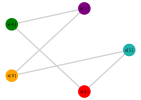

In [15]:
# inferred interaction graph 
g = Graphs.SimpleGraph(adj_matrix)
nodelabel = ["x[$i]" for i in 1:n]
nodefillc = [colorant"lightseagreen", colorant"red" , colorant"orange", colorant"green", colorant"purple"]
gplot(g, nodefillc = nodefillc, layout = circular_layout, nodelabel = nodelabel, nodelabelangleoffset = π/4)

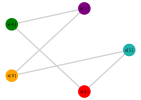

In [16]:
# interaction graph of the groundtruth
gt = Graphs.SimpleGraph(f_gt)
nodelabel = ["x[$i]" for i in 1:n]
nodefillc = [colorant"lightseagreen", colorant"red" , colorant"orange", colorant"green", colorant"purple"]
gplot(gt, nodefillc = nodefillc, layout = circular_layout, nodelabel = nodelabel, nodelabelangleoffset = π/4)


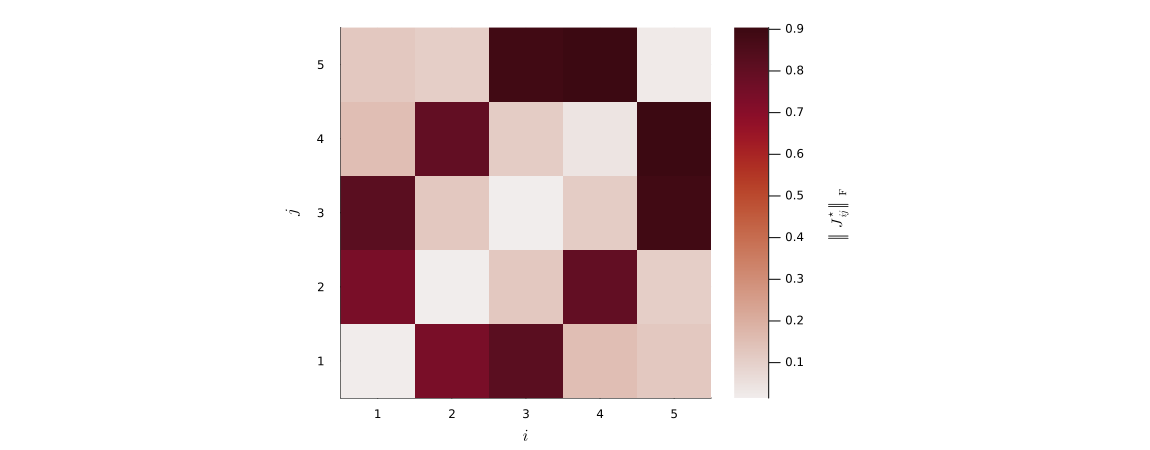

In [17]:
plot_f = heatmap(f, xlabel = L"i", ylabel = L"j",
	colorbar_title = L"\left\Vert J^{\star}_{ij} \right\Vert_{\operatorname{F}}",
	aspect_ratio = 1, xlim = (0.5, 5.5), c = :amp)
plot(plot_f, size = (1150, 450), margin = 5Plots.mm)

## Remark

Comparing the interaction networks of the ground truth and the results obtained through the Boltzmann Machine, we can observe a perfect correspondance between the two graphs. 
We have assumed a lower bound of the interaction parameter of $0.2$ in order for the Potts variables to be considered interacting, so that we can filter out a bit of the noise due to experimental data.

## 3. Bayesian approach

### Posterior density

From the bayesian theory we recall that the posterior distribution of the parameter $\boldsymbol{J}$ (up to a positive multiplicative constant) is such that
\begin{align*}
	P\left(\boldsymbol{J} | \left\{x^{(m)}\right\}_{m = 1}^M \right) & \propto P\left(\left\{x^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right) P\left(\boldsymbol{J}\right) = \\
	& = \frac{1}{Z(\boldsymbol{J})^M} \exp\left[\sum_{m = 1}^M \sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b}\right]\exp\left[-\lambda \sum_{i, j = 1}^N \sum_{a, b = 1}^{q} \left|J_{i, j}(a, b)\right|\right] = \\
	& = \frac{1}{Z\left(\boldsymbol{J}\right)^{M}} \exp\left[\sum_{i, j = 1}^N \left(\sum_{m = 1}^M J_{i, j}(x_i^{(m)}, x_j^{(m)}) - \lambda \sum_{a, b = 1}^{q} \left|J_{i, j}(a, b)\right|\right)\right],
\end{align*}
where the previous chain of equations follows from the definition of conditional density.

Our objective is to modify the Boltzmann machine learning scheme in order to include the posterior distribution just computed.
This can be done in several ways by substituting the classical maximum likelihood estimation of the parameter $\boldsymbol{J}$ with a Bayes estimation. To do so we have to set up a decision theory framework. 

### Maximum a posteriori estimation

We follow the classical Bayesian approach and introduce a loss function $L(\theta, \hat{\theta})$ and its related risk function $R(\hat{\theta})$ as follows
\begin{align*}
	& L(\theta, \hat{\theta}) \coloneqq 1 - \delta(\hat{\theta} - \theta) \\
	& \begin{aligned}
		R(\hat{\theta}) & \coloneqq \mathbb{E}_{\theta | x}\left[L(\theta, \hat{\theta})\right] = \int_{\Theta} L(\theta, \hat{\theta}) p(\theta | x) d\theta = \\
		& \ = 1 - \int_{\Theta} \delta(\hat{\theta} - \theta) p(\theta | x) d\theta = \\
		& \ = 1 - p(\hat{\theta} | x),
	\end{aligned}
\end{align*}
where $\delta$ is the Dirac delta function (here we are committing a huge abuse of notation: we are using $\delta$ as the Radon-Nikodym derivative of the dirac measure but it does not exists such a derivative; we will formalize it in the very end of this section). We used the so-called $0-1$-loss function in order to obtain an eastimator easy to compute. 

Hence, by minimizing the risk function, one obtains a maximum a posteriori (MAP) estimate of $\theta$ which is
\begin{align*}
	\hat{\theta}_{\rm{MAP}} & = \operatorname*{argmin}_{\theta \in \Theta} R(\theta) = \\
	& = \operatorname*{argmin}_{\theta \in \Theta} 1 - p(\theta | x) = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} p(\theta | x) = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} \frac{p(x | \theta) p(\theta)}{\int_{\Theta} p(x | \theta) p(\theta) d\theta} = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} p(x | \theta) p(\theta).
\end{align*}

So defining a new *likelihood function* $\mathcal{L}_{\rm{MAP}}(\theta) \coloneqq p(x | \theta) p(\theta)$ one obtains
\begin{equation*}
	\hat{\theta}_{\rm{MAP}} = \operatorname*{argmax}_{\theta \in \Theta} \mathcal{L}_{\rm{MAP}}(\theta).
\end{equation*}
Moreover, if $l_{\rm{MAP}}(\theta) \coloneqq \log{\mathcal{L}_{\rm{MAP}}(\theta)}$, it holds
\begin{equation*}
	l_{\rm{MAP}}(\theta) = \log{p(x | \theta) p(\theta)} = l_{\rm{ML}}(\theta) + \log{p(\theta)},
\end{equation*}
where $l_{\rm{ML}}(\theta)$ is the classical log-likelihood function used in maximum likelihood estimation.

Actually, in order to be formal, one should define a family of loss function $\forall \varepsilon > 0$ as follows:
\begin{align*}
	& L_{\varepsilon}(\theta, \hat{\theta}) \coloneqq 1 - \mathbf{1}_{(-\varepsilon, \varepsilon)}(\hat{\theta} - \theta) \frac{1}{2\varepsilon} \\
	& \begin{aligned}
		R_{\varepsilon}(\hat{\theta}) & = \mathbb{E}_{\theta | x}\left[L_{\varepsilon}(\theta, \hat{\theta})\right] = \\
		& = 1 - \int_{-\hat{\theta} - \varepsilon}^{\hat{\theta} + \varepsilon} \frac{1}{2\varepsilon} p(\theta | x) d\theta.
	\end{aligned}
\end{align*}
Then, by taking $\varepsilon \to 0$, one obtains the risk used above, i.e. $R(\hat{\theta}) = 1 - p(\hat{\theta} | x)$.

### Estimation of $\boldsymbol{J}$ with MAP

Following the procedure just introduced we can compute $l_{\rm{MAP}}(\boldsymbol{J})$
\begin{align*}
	l_{\rm{MAP}}(\boldsymbol{J}) & = \log\left(P\left(\left\{x^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right) P\left(\boldsymbol{J}\right)\right)= \\
	& = \log\left(\frac{1}{Z\left(\boldsymbol{J}\right)^{M}} \exp\left[\sum_{i, j = 1}^N \sum_{a, b = 1}^q \left(\sum_{m = 1}^M J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b} - \lambda \left|J_{i, j}(a, b)\right|\right)\right]\right) = \\
	& = \sum_{i, j = 1}^N \sum_{a, b = 1}^q \left(\sum_{m = 1}^M J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b} - \lambda \left|J_{i, j}(a, b)\right|\right) - M \log{Z\left(\boldsymbol{J}\right)}.
\end{align*}
Then we derive it w.r.t. $J_{i, j}(a, b)$, for fixed $i, j, a, b$, assuming that $\frac{d |x|}{dx} = \operatorname{sgn}(x)$ where, by convention, we assume $\operatorname{sgn}(0) = 1$:
\begin{equation*}
    \frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)} 
	= \left(\sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b} - \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right) - \frac{M}{Z(\boldsymbol{J})} \frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)},
\end{equation*}
where we recall that
\begin{equation*}
	\frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)} = \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right].
\end{equation*}
Dividing by $M$ (observe that this operation is safe because a scaling does not modify the *direction* of the derivative) we obtain
\begin{align*}
	\frac{1}{M}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)} & = \left(\frac{1}{M} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \left(\frac{1}{M} \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right) + \\
	& \kern{13pt} - \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right] = \\
	& = \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}} - \left(\frac{1}{M} \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right).
\end{align*}

### Boltzmann machine learning scheme

As we did in point 1 we set up another Boltzmann machine learning scheme in order to infer $\boldsymbol{J}$ by taking in acm the prior distribution of $P\left(\boldsymbol{J}\right)$: $\forall i, j, a, b$
\begin{align*}
	& J_{i, j}^{0}(a, b) = 0, \\
	& J_{i, j}^{t + 1}(a, b) \leftarrow J_{i, j}^{t}(a, b) + \mu \left[\frac{1}{M}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J}^t)}{\partial J_{i,j}(a,b)}\right], \ \forall t \geq 0.
\end{align*}
Note that we are already able to compute all the terms of $\frac{1}{M}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J}^t)}{\partial J_{i,j}(a,b)}$ so we can directly proceed with the numerical estimation of $\boldsymbol{J}$. 

We call the estimated parameter $\boldsymbol{J}_{\rm{bayes}}^\star$.

### Code

In [18]:
function boltzmann_ml_bayes(δ_data::PottsParam, J::PottsParam,
					m::Int64, λ::Float64, t_burnin::Int64, t_tot::Int64, t_wait::Int64, t_max::Int64;
					μ::Float64 = 0.1, ε_max::Float64 = 1e-2, verbose::Bool = true)
	n = δ_data.n
	q = δ_data.q

	bayes_term = PottsParam(n, q)
	direction_bayes = PottsParam(n, q)

	x = sample(collect(1:q), n, replace = true)
	x_model = zeros(Int64, t_tot, n)
	δ_model = PottsParam(n, q)

	t = 0
	ε = 1
	ProgressMeter.ijulia_behavior(:clear)
	p = ProgressUnknown("learning...", spinner = true)

	while t <= t_max && ε > ε_max
		t += 1
		fill!(x_model, 0)
		x = sample(collect(1:q), n, replace = true)

		for s in 1:t_burnin
			x = metropolis_hastings_step(x, J)
		end
		for s in 1:t_tot
			for r in 1:t_wait
				x = metropolis_hastings_step(x, J)
			end
			x_model[s, :] = x
		end
		compute_stat!(δ_model, x_model)

		for i in 1:size(J.main, 1), a in 1:size(J.main[1], 1)
			bayes_term.main[i][a] = 1 / M * λ * sign(J.main[i][a])
		end

		direction_bayes.main .= δ_data.main - δ_model.main - bayes_term.main
		J.main .+= μ .* direction_bayes.main

		ε = maxabs_parameter(direction_bayes)

		if mod(t, t_max ÷ 10) == 0 && verbose
			ProgressMeter.next!(p; showvalues = [(:t, t), (:ε, ε)], spinner = "⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏")
		end
	end

	ProgressMeter.finish!(p)

	return δ_model, J, x_model, t, ε
end;

In [19]:
# boltzmann ml scheme
M = size(x_data, 1)
λ = 0.1
J_bayes = PottsParam(n, q)
δ_model_bayes, J_bayes, t_bayes, ε_bayes = boltzmann_ml_bayes(δ_data, J_bayes, M, λ, t_burnin, t_tot, t_wait, t_max);

⠋ learning... 	 Time: 0:00:01
  t:  100
  ε:  0.043049999999999984

⠙ learning... 	 Time: 0:00:01
  t:  150
  ε:  0.04645000000000001

⠹ learning... 	 Time: 0:00:02
  t:  200
  ε:  0.03854999999999998

⠸ learning... 	 Time: 0:00:03
  t:  250
  ε:  0.03654999999999998

⠼ learning... 	 Time: 0:00:03
  t:  300
  ε:  0.04245000000000001

⠴ learning... 	 Time: 0:00:04
  t:  350
  ε:  0.04495000000000001

⠦ learning... 	 Time: 0:00:04
  t:  400
  ε:  0.031049999999999973

⠧ learning... 	 Time: 0:00:05
  t:  450
  ε:  0.03095

⠇ learning... 	 Time: 0:00:05
  t:  500
  ε:  0.03855000000000001

✓ learning... 	 Time: 0:00:05


5×5 Matrix{Float64}:
 0.0173881  0.736932   0.829086   0.166018   0.104613
 0.736932   0.0171203  0.117295   0.802544   0.103339
 0.829086   0.117295   0.0213117  0.100348   0.87703
 0.166018   0.802544   0.100348   0.0554304  0.905453
 0.104613   0.103339   0.87703    0.905453   0.0115073

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

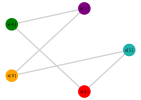

In [20]:
# replication of point 2 with J_bayes
f_bayes = zeros(n, n)
for i in 1:n, j in 1:n
	f_bayes[i, j] = frobenius_norm(J_bayes.main[cart2lin(i, j, n)])
end
display(f_bayes)

neighbours_bayes = [Int64[], Int64[], Int64[], Int64[], Int64[]]
for i in 1:n, j in 1:n
	if (f_bayes[i, j] > 0.2)
		append!(neighbours_bayes[i], [j])
	end
end

adj_matrix_bayes = f_bayes .> 0.2

neighbours_bayes = mapreduce(permutedims, vcat, neighbours_bayes)
display(neighbours_bayes)

g_bayes = Graphs.SimpleGraph(adj_matrix_bayes)
nodelabel = ["x[$i]" for i in 1:n]
nodefillc = [colorant"lightseagreen", colorant"red" , colorant"orange", colorant"green", colorant"purple"]
gplot(g_bayes, nodefillc = nodefillc, layout = circular_layout, nodelabel = nodelabel, nodelabelangleoffset = π/4)

5×5 Matrix{Float64}:
 0.0176491  0.742555  0.82271    0.153209   0.123581
 0.742555   0.015065  0.124066   0.800708   0.107235
 0.82271    0.124066  0.0150062  0.112271   0.889915
 0.153209   0.800708  0.112271   0.0413211  0.904101
 0.123581   0.107235  0.889915   0.904101   0.0245346

5×5 Matrix{Float64}:
 0.0173881  0.736932   0.829086   0.166018   0.104613
 0.736932   0.0171203  0.117295   0.802544   0.103339
 0.829086   0.117295   0.0213117  0.100348   0.87703
 0.166018   0.802544   0.100348   0.0554304  0.905453
 0.104613   0.103339   0.87703    0.905453   0.0115073

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

- minimum(f_bayes - f) = -0.01896769754022279
- maximum(f_bayes - f) = 0.014109266465655135
- maximum difference between the entries of J and J_{bayes} = 0.021700000000000025

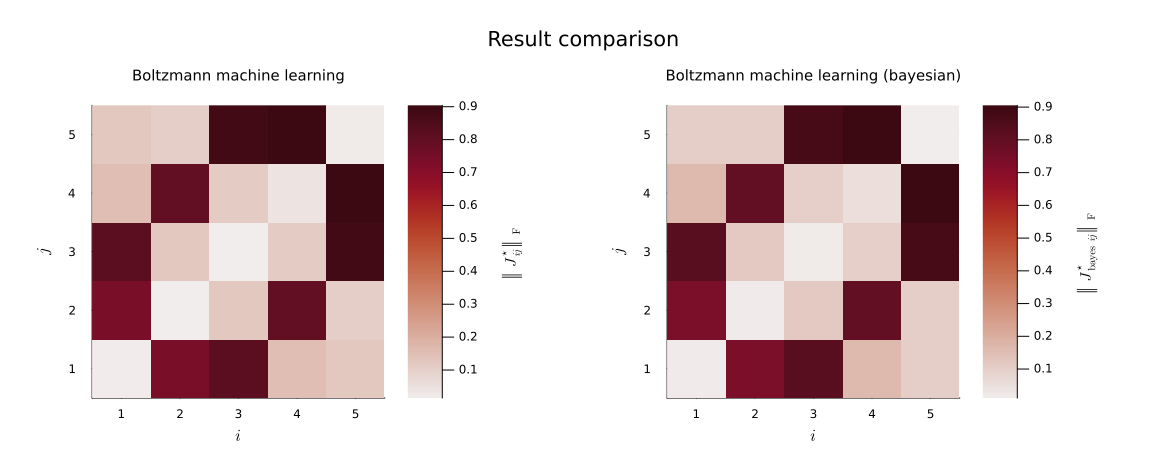

In [21]:
# comparison J, J_bayes
display(f)
display(f_bayes)
display(f_gt)

print("- minimum(f_bayes - f) = " , minimum(f_bayes - f), "\n- maximum(f_bayes - f) = ", maximum(f_bayes - f), "\n")
J_diff = PottsParam(n, q)
J_diff.main .= J_bayes.main - J.main
print("- maximum difference between the entries of J and J_{bayes} = ", maxabs_parameter(J_diff))

plot_f = heatmap(f, xlabel = L"i", ylabel = L"j", title = "Boltzmann machine learning",
	titlefontsize = 10, colorbar_title = L"\left\Vert J^{\star}_{ij} \right\Vert_{\operatorname{F}}",
	aspect_ratio = 1, xlim = (0.5, 5.5), c = :amp)
plot_f_bayes = heatmap(f_bayes, xlabel = L"i", ylabel = L"j", title = "Boltzmann machine learning (bayesian)",
	titlefontsize = 10, colorbar_title = L"\left\Vert J_{\operatorname{bayes}}^{\star}_{ij} \right\Vert_{\operatorname{F}}",
	aspect_ratio = 1, xlim = (0.5, 5.5), c = :amp)
plot(plot_f, plot_f_bayes, layout = @layout([B C]), legend = false, plot_title = "\nResult comparison",
	plot_titlefontsize = 14, plot_titlevspan = 0.15, size = (1150, 450), margin = 5Plots.mm)

## Remark

We have a visible comparison of the results obtained with the standard Boltzmann Machinery and its Bayesian version.
Given the corresponding heatmaps, we can observe how they differ only slightly on the values of the interaction parameters, but they maintain the same interaction network (as can be clearly seen also by comparing the corresponding interaction graphs).
Thus we can deduce that we do not have any significant advantage when choosing the latter approach over the former, given additionally the similarity of the computation times.

## 4. Experiment repeated changing $M$

### Description

We let $m\leq M$ vary and observe how this affects the distance of $\mathcal{F}_m$ from $\mathcal{F}$ (in both *Frobenius* and *uniform* norm, where the latter is intended as the maximum of the entries of the matrix and not as an operator norm). 

$\mathcal{F}$ is the matrix inferred in point $1$ using the *Boltzmann scheme* with $M = 2000$ observations.

### Code

In [22]:
# experiment repeated for various m ≤ M
M = size(x_data, 1)
div = 100
f_m = [zeros(n, n) for i in 1:(M ÷ div)]
ε = []
index = 0

ProgressMeter.ijulia_behavior(:clear)
p = Progress(M ÷ div, "progress... ")

for m in div:div:M
	index += 1

	# bml on m random inputs out of M
	x_data_m = x_data[sample(collect(1:M), m, replace = false), :]
	δ_data_m = PottsParam(n, q)	
	compute_stat!(δ_data_m, x_data_m)
	J_m = PottsParam(n, q)
	δ_model_m, J_m, x_model_m, _, _ = boltzmann_ml(δ_data_m, J_m, t_burnin, t_tot, t_wait, t_max; verbose = false)

	for i in 1:n, j in 1:n
		f_m[index][i, j] = frobenius_norm(J_m.main[cart2lin(i, j, n)])
	end

	push!(ε, [frobenius_norm(f_m[index] - f), maximum(f_m[index] - f)])

	next!(p)
end

finish!(p)

progress...  10%|████                                   |  ETA: 0:01:37

progress...  15%|██████                                 |  ETA: 0:01:30

progress...  20%|████████                               |  ETA: 0:01:24

progress...  25%|██████████                             |  ETA: 0:01:17

progress...  30%|████████████                           |  ETA: 0:01:11

progress...  35%|██████████████                         |  ETA: 0:01:05

progress...  40%|████████████████                       |  ETA: 0:01:00

progress...  45%|██████████████████                     |  ETA: 0:00:55

progress...  50%|████████████████████                   |  ETA: 0:00:50

progress...  55%|██████████████████████                 |  ETA: 0:00:44

progress...  60%|████████████████████████               |  ETA: 0:00:39

progress...  65%|██████████████████████████             |  ETA: 0:00:35

progress...  70%|████████████████████████████           |  ETA: 0:00:30

progress...  75%|██████████████████████████████         |  ETA: 0:00:24

progress...  80%|████████████████████████████████       |  ETA: 0:00:19

progress...  85%|██████████████████████████████████     |  ETA: 0:00:14

progress...  90%|████████████████████████████████████   |  ETA: 0:00:10

progress...  95%|██████████████████████████████████████ |  ETA: 0:00:05

progress... 100%|███████████████████████████████████████| Time: 0:01:33


ε_frobenius = [2.15, 1.08, 0.82, 0.63, 0.67, 0.39, 0.46, 0.4, 0.35, 0.32, 0.27, 0.2, 0.2, 0.19, 0.22, 0.13, 0.11, 0.11, 0.07, 0.07]
ε_max = [0.75, 0.45, 0.29, 0.25, 0.22, 0.14, 0.15, 0.14, 0.18, 0.12, 0.09, 0.11, 0.06, 0.06, 0.09, 0.05, 0.03, 0.04, 0.02, 0.02]

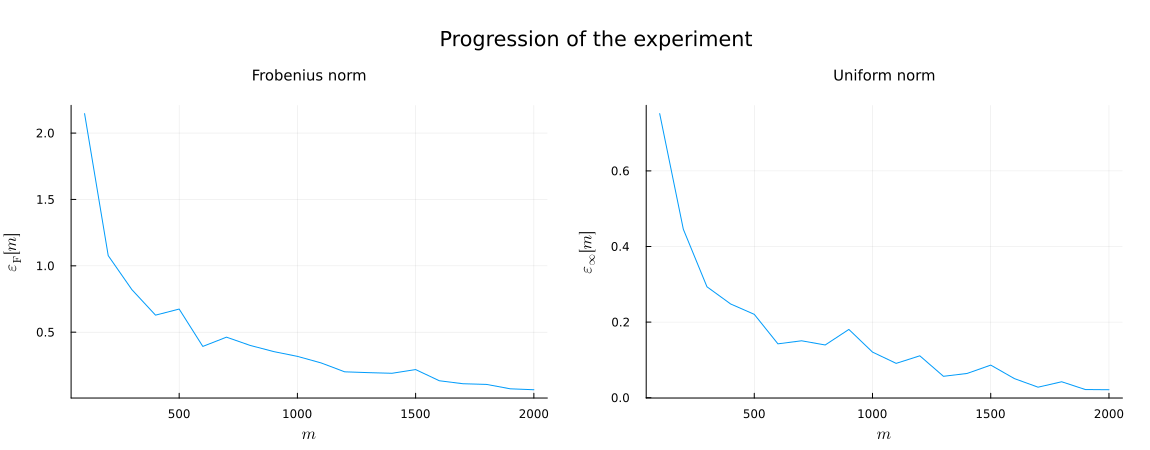

In [23]:
ε_frobenius = [ε[i][1] for i = 1:(M ÷ div)]
ε_max = [ε[i][2] for i = 1:(M ÷ div)]

print("ε_frobenius = ", round.(ε_frobenius; digits = 2), "\n")
print("ε_max = ", round.(ε_max; digits = 2))

plot_frobenius = plot(div:div:M, ε_frobenius, xlabel = L"m", 
	ylabel = L"\varepsilon_{\operatorname{F}}[m]", title = "Frobenius norm", titlefontsize = 10)
plot_max = plot(div:div:M, ε_max, xlabel = L"m",
	ylabel = L"\varepsilon_{\infty}[m]", title = "Uniform norm", titlefontsize = 10)
plot(plot_frobenius, plot_max, layout = @layout([B C]), legend = false, plot_title = "\nProgression of the experiment",
	plot_titlefontsize = 14, plot_titlevspan = 0.15, size = (1150, 450), margin = 5Plots.mm)

## 5. Auto-correlation function

Define the auto-correlation function (*acf*) for a stationary process, as follows 
\begin{align*}
	\gamma(r) = \left(\mathbb{E}\left[(x^{(t)} - \mu) (x^{(t + r)} - \mu)^{T}\right]\right) \Sigma^{-1}, \ \forall r \geq 0
\end{align*}
with
\begin{align*}
	\Sigma = \operatorname{Var}\left(x^{(t)}\right).
\end{align*}

A Monte Carlo estimator for such function is 
\begin{align*}
	\hat{\gamma}(r) = \left(\displaystyle \frac{1}{n - r} \sum_{i = 1}^{n - r} (x^{(i)} - \hat{\mu}_{n}) (x^{(i + r)} - \hat{\mu}_n)^{T}\right) \left(\displaystyle \frac{1}{n} \sum_{i = 1}^{n} (x^{(i)} - \hat{\mu}_n) (x^{(i)} - \hat{\mu}_n)^T\right)^{-1}, \ \forall r = 0, \dots, \left\lfloor\frac{(n - 1)}{3}\right\rfloor,
\end{align*}
with
\begin{align*}
	\hat{\mu}_{n} = \frac{1}{n} \sum_{i = 1}^{n} x^{(i)}.
\end{align*}

Note that we are using a generalization of the classical definition of *acf* in the case of $N$-dimensional random vetors.

In order to visualise the behaviour of the *acf* globally we plot $\left(\left\|\hat{\gamma}(r)\right\|\right)_{r = 0}^{\left\lfloor(n - 1)/2\right\rfloor}$ for some different values of the number of samples extracted $M$, and various waiting times $T_{\rm{wait}}$ between two subsequent sampling obtained through the Metropolis-Hastings algorithm. 

We did so with both the $L^2$ and the $L^{\infty}$ norms and realising that we had a better result with the uniform norm, we chose to carry out most of the plots with that. 

In [24]:
function autocorrelation(chain::Vector{Vector{Int64}})
	n = size(chain, 1)
	dim = size(chain[1], 1)

	μ = 1 / n * sum(chain)
	γ = [zeros(Float64, dim, dim) for r in 0:((n - 1) ÷ 3)]

	t_r = ((n - 1) ÷ 3)

	for r in 0:t_r
		a = zeros(Float64, dim, dim)
		b = zeros(Float64, dim, dim)
		
		for i in 1:(n - r)
			a .+= (chain[i] .- μ) * transpose(chain[i + r] .- μ)
		end
		a ./= (n - r)
		
		for i in 1:n
			b .+= (chain[i] .- μ) * transpose(chain[i] .- μ)
		end
		b ./= n
		
		# we can't assign γ[0] so we shift the whole sequence
		γ[r + 1] = a * inv(b)
	end
	
	return γ
end;

In [25]:
function mhmc_sampling(J::PottsParam, t_burnin::Int64, t_tot::Int64, t_wait::Int64;
					x_0::Vector{Int64} = Int64[])
	n = J.n
	q = J.q

	if isempty(x_0)
		x_0 = sample(collect(1:q), n, replace = true)
	end
	
	vec_x = [zeros(Int64, n) for _ in 1:t_tot]
	x = x_0
	
	for _ in 1:t_burnin
		x = metropolis_hastings_step(x, J)
	end

	for s in 1:t_tot
		for _ in 1:t_wait
			x = metropolis_hastings_step(x, J)
		end
		vec_x[s] .= x
	end

	autocorr = autocorrelation(vec_x)

	return vec_x, autocorr
end;

In [26]:
# parameters
tt = [250, 500, 1000, 2000]
tw = [1, 5, 10, 100];

In [27]:
# computation of the acf
tr = [((tt[i] - 1) ÷ 3) for i in eachindex(tt)]
ac = [[[zeros(Float64, n, n) for _ in 0:t_r] for _ in eachindex(tw)] for t_r in tr]

for (i, t_tot) in enumerate(tt)
	for (j, t_wait) in enumerate(tw)
		_, ac[i][j] = mhmc_sampling(J, t_burnin, t_tot, t_wait)
	end
end

# norms of the acf
ac_2 = [[zeros(Float64, (t_r + 1)) for _ in eachindex(tw)] for t_r in tr]
ac_inf = [[zeros(Float64, (t_r + 1)) for _ in eachindex(tw)] for t_r in tr]
for index_tw in eachindex(tw), (index_tr, t_r) in enumerate(tr)
	for r in 0:t_r
		ac_2[index_tr][index_tw][r + 1] = norm(ac[index_tr][index_tw][r + 1], 2)
		ac_inf[index_tr][index_tw][r + 1] = norm(ac[index_tr][index_tw][r + 1], Inf)
	end
end

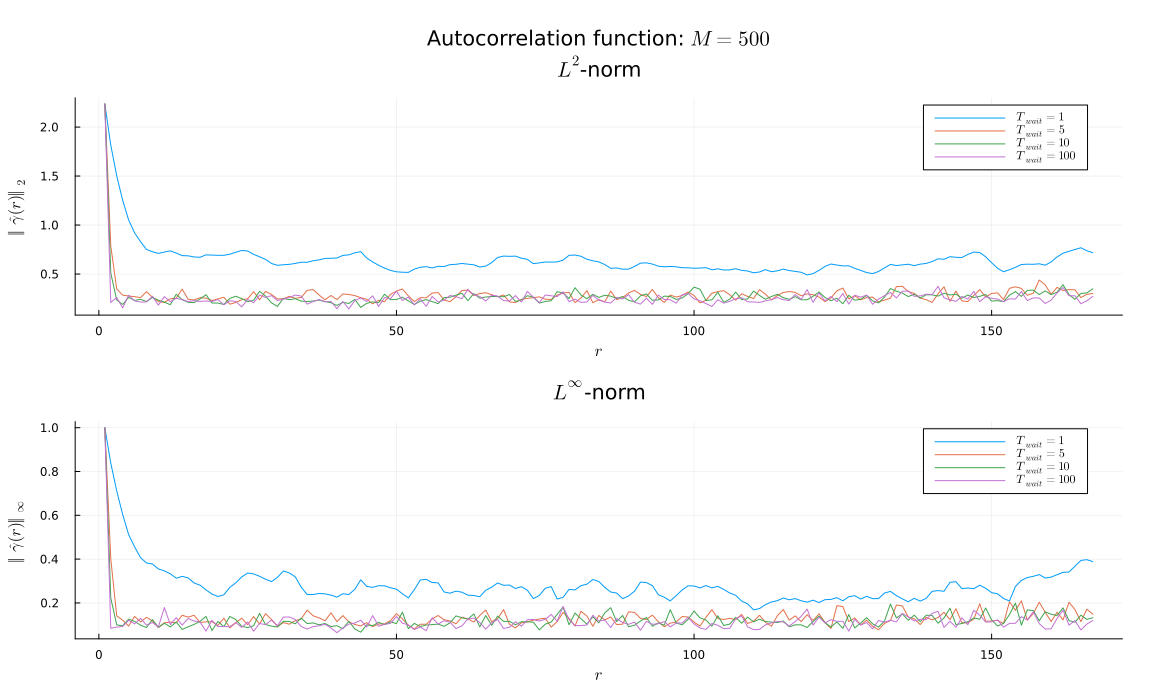

In [28]:
# plot with t_tot = 500 (i.e. M = 500), both norms
index_tt = 2
label = reshape([(latexstring("T_{wait} = " * "$(tw[i])")) for i in 1:length(tw)], 1, length(tw))
plot_2 = plot(ac_2[index_tt], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_2", 
	title = L"L^2" * "-norm", label = label, size = (1150, 350), margin = 5Plots.mm)
plot_inf = plot(ac_inf[index_tt], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_{\infty}", 
	title = L"L^{\infty}" * "-norm", label = label, size = (1150, 350), margin = 5Plots.mm)
plot(plot_2, plot_inf, layout = @layout([B ; C]), plot_title = "\nAutocorrelation function: " * latexstring("M = " * "$(tt[index_tt])"),
	plot_titlefontsize = 14, plot_titlevspan = 0.075, size = (1150, 700), margin = 5Plots.mm)

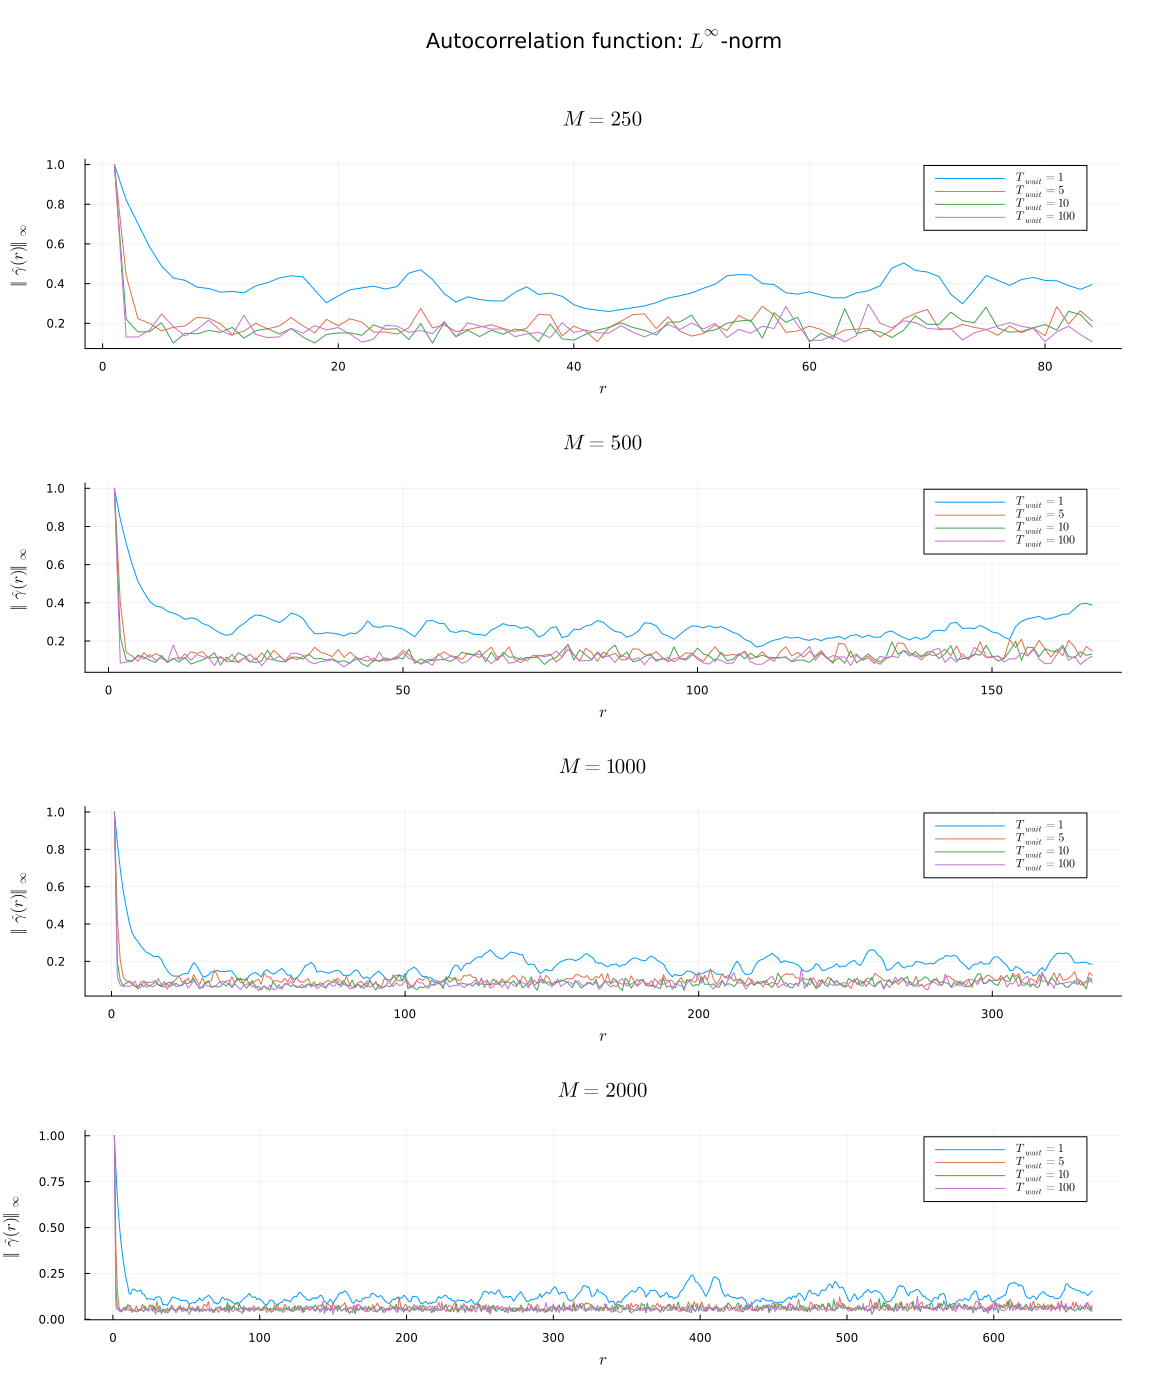

In [29]:
# plot with all t_tot in tt, uniform norm
plot_inf_1 = plot(ac_inf[1], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_{\infty}", 
	title = latexstring("M = " * "$(tt[1])"), label = label, size = (1150, 350), margin = 5Plots.mm)
plot_inf_2 = plot(ac_inf[2], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_{\infty}", 
	title = latexstring("M = " * "$(tt[2])"), label = label, size = (1150, 350), margin = 5Plots.mm)
plot_inf_3 = plot(ac_inf[3], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_{\infty}", 
	title = latexstring("M = " * "$(tt[3])"), label = label, size = (1150, 350), margin = 5Plots.mm)
plot_inf_4 = plot(ac_inf[4], xlabel = L"r", ylabel = L"\left\Vert\hat{\gamma}\,(r)\right\Vert_{\infty}",
	title = latexstring("M = " * "$(tt[4])"), label = label, size = (1150, 350), margin = 5Plots.mm)
plot(plot_inf_1, plot_inf_2, plot_inf_3, plot_inf_4, layout = @layout([B ; C ; D ; E]), 
	plot_title = "\nAutocorrelation function: " * L"L^{\infty}" * "-norm",
	plot_titlefontsize = 14, plot_titlevspan = 0.075, size = (1150, 1400), margin = 5Plots.mm)

## Remark

In the following we have computed the *acf* only up to $r = \left\lfloor{\frac{(n - 1)}{3}}\right\rfloor$: the value is due to some considerations that were made on the consistency of the estimators used in the model to compute the autocorrelation function itself.

The numerator is the sum of $n - r$ terms, and thus becomes less and less consistent the more $r$ grows; in particular it cannot be $r = n$ (hence the term $n - 1$), since the denominator in the coefficient in front would explode.

Moreover we have observed through repeated runs that it becomes quite unstable whenever we consider $r \geq \left\lfloor{\frac{(n - 1)}{2}}\right\rfloor$: a good compromise has thus been found in the value considered, so that it is big enough to show the behaviour of the autocorrelation function but it is small enough that the instablities do not emerge yet.